In [1]:
from __future__ import division       
import math
#import matplotlib as mpl              ### May need to uncomment these two lines for mac osx users
#mpl.use('TkAgg')                      ###
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
%matplotlib inline

Lets load in the dataset

In [2]:
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q


Lets see the types that were imported on our behalf

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


See the shape of the dataset

In [7]:
df.shape

(891, 12)

Here we can see the that it has 891 rows of data and 12 attributes worth of imformation.

In [8]:
len(df)

891

In [9]:
len(df.columns)

12

In [10]:
# where df.columns is 
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [12]:
my_famous_passenger = df[df["Name"] == "Guggenheim, Mr. Benjamin"]
print(my_famous_passenger)

     PassengerId  Survived  Pclass                      Name   Sex  Age  \
789          790         0       1  Guggenheim, Mr. Benjamin  male   46   

     SibSp  Parch    Ticket  Fare    Cabin Embarked  
789      0      0  PC 17593  79.2  B82 B84        C  


In [13]:
###Lets get some information about a column

### Like mean age on the boat
df["Age"].mean()

### Fare
df["Fare"].mean()
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [14]:
my_rich_passenger = df[df["Fare"] == 512.3292]
print(my_rich_passenger)

     PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex  Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female   35      0      0  PC 17755  512.3292          NaN        C  
679    male   36      0      1  PC 17755  512.3292  B51 B53 B55        C  
737    male   35      0      0  PC 17755  512.3292         B101        C  


In [15]:
####Lets rearrange some columns. This would be very hard to do using a csv library and doing this by hand.
####Panda allows us to do this very intuitively
cols = list(df.columns.values)
print(cols)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [16]:
#Using that list above, we can create a new list, with the values rearranged.
cols = ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'PassengerId']
new_df = df[cols]
new_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,4
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,5


In [17]:
#### We can create new dataframes from a few attributes
new_df = df[["Sex","Age"]]
new_df.head()


,Sex,Age
0,male,22
1,female,38
2,female,26
3,female,35
4,male,35


In [18]:
df_of_women = df[df["Sex"] == "female"] #### Elaborate and find out what it means to df a df? Look up panda series
df_of_men = df[df["Sex"] == "male"]

In [19]:
df_of_women.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [20]:
df_of_women.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [21]:
# Excercise 
# Create three data frames. Capture them by passenger class 'PClass'. 
# There are three of them. Then figure out the size of each one.





In [22]:
df_pclass_1 = df[df["Pclass"] == 1]
df_pclass_1.head()
df_pclass_1.shape

(216, 12)

In [23]:
df_pclass_2 = df[df["Pclass"] == 2]
df_pclass_2.head()
df_pclass_2.shape

(184, 12)

In [24]:
df_pclass_3 = df[df["Pclass"] == 3]
df_pclass_3.head()
df_pclass_3.shape

(491, 12)

Observations: There were many people in third class. More so than the other two class of passengers combined.

We can create new attributes from other attributes!

In [25]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0


Since we know that Parch is the number of parents or children onboard, and SibSp is the number of siblings or spouses, we could collect those together as a FamilySize

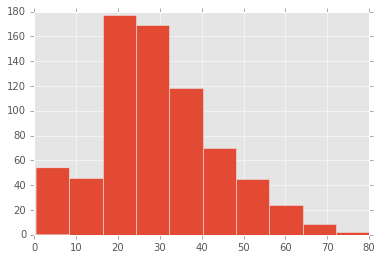

In [26]:
df["Age"].hist()

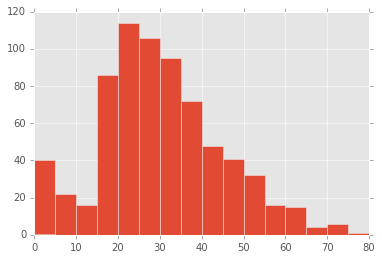

In [27]:
df["Age"].dropna().hist(bins=16, range=(0,80))

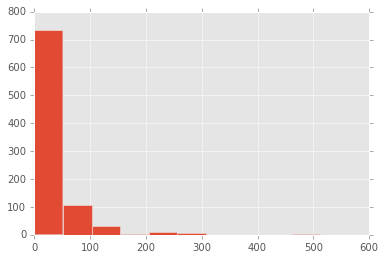

In [28]:
df["Fare"].hist()

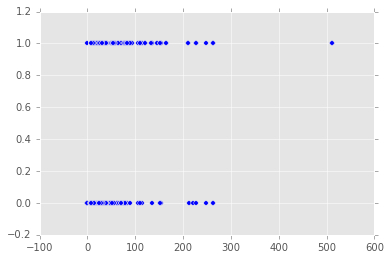

In [29]:
plt.scatter(df['Fare'], df['Survived'])
plt.show()

In [30]:
### Side step
# Lets create a scatter plot

d = {'one' : np.random.rand(10),
     'two' : np.random.rand(10)}
print(d)

{'two': array([ 0.88287908,  0.27513795,  0.49459815,  0.160201  ,  0.70718459,
        0.3154231 ,  0.13820007,  0.93506698,  0.5701513 ,  0.32960527]), 'one': array([ 0.91182516,  0.37904446,  0.63963111,  0.35683264,  0.27398722,
        0.76714015,  0.88904579,  0.07728048,  0.69935626,  0.46812066])}


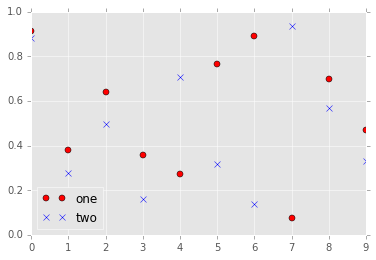

In [31]:
df_scrap = pd.DataFrame(d)
df_scrap.plot(style=['ro','bx'])

In [32]:
##### Back to the titanic. So we have our original dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0


In [33]:
#### Lets group them by gender
grouped_by_sex = df.groupby(["Sex"])
grouped_by_sex.describe()

Age  FamilySize        Fare       Parch  PassengerId  \
Sex                                                                         
female count  261.000000  314.000000  314.000000  314.000000   314.000000   
       mean    27.915709    1.343949   44.479818    0.649682   431.028662   
       std     14.110146    1.755733   57.997698    1.022846   256.846324   
       min      0.750000    0.000000    6.750000    0.000000     2.000000   
       25%     18.000000    0.000000   12.071875    0.000000   231.750000   
       50%     27.000000    1.000000   23.000000    0.000000   414.500000   
       75%     37.000000    2.000000   55.000000    1.000000   641.250000   
       max     63.000000   10.000000  512.329200    6.000000   889.000000   
male   count  453.000000  577.000000  577.000000  577.000000   577.000000   
       mean    30.726645    0.665511   25.523893    0.235702   454.147314   
       std     14.678201    1.478106   43.138263    0.612294   257.486139   
       min      0.420000    0.000000    0.000000    0.000000     1.000000   
       25%     21.000000    0.000000    7.895800    0.000000   222.000000   
       50%     29.000000    0.000000   10.500000    0.000000   464.000000   
       75%     39.000000    1.000000   26.550000    0.000000   680.000000   
       max     80.000000   10.000000  512.329200    5.000000   891.000000   

                  Pclass       SibSp    Survived  
Sex                                               
female count  314.000000  314.000000  314.000000  
       mean     2.159236    0.694268    0.742038  
       std      0.857290    1.156520    0.438211  
       min      1.000000    0.000000    0.000000  
       25%      1.000000    0.000000    0.000000  
       50%      2.000000    0.000000    1.000000  
       75%      3.000000    1.000000    1.000000  
       max      3.000000    8.000000    1.000000  
male   count  577.000000  577.000000  577.000000  
       mean     2.389948    0.429809    0.188908  
       std      0.813580    1.061811    0.391775  
       min      1.000000    0.000000    0.000000  
       25%      2.000000    0.000000    0.000000  
       50%      3.000000    0.000000    0.000000  
       75%      3.000000    0.000000    0.000000  
       max      3.000000    8.000000    1.000000

In [34]:
#### Lets group them by gender
grouped_by_sex_and_pclass = df.groupby(["Sex", "Pclass"])
grouped_by_sex_and_pclass.describe()

Age  FamilySize        Fare       Parch  \
Sex    Pclass                                                         
female 1      count   85.000000   94.000000   94.000000   94.000000   
              mean    34.611765    1.010638  106.125798    0.457447   
              std     13.612052    1.102243   74.259988    0.728305   
              min      2.000000    0.000000   25.929200    0.000000   
              25%     23.000000    0.000000   57.244800    0.000000   
              50%     35.000000    1.000000   82.664550    0.000000   
              75%     44.000000    1.000000  134.500000    1.000000   
              max     63.000000    5.000000  512.329200    2.000000   
       2      count   74.000000   76.000000   76.000000   76.000000   
              mean    28.722973    1.092105   21.970121    0.605263   
              std     12.872702    1.190828   10.891796    0.833930   
              min      2.000000    0.000000   10.500000    0.000000   
              25%     22.250000    0.000000   13.000000    0.000000   
              50%     28.000000    1.000000   22.000000    0.000000   
              75%     36.000000    2.000000   26.062500    1.000000   
              max     57.000000    5.000000   65.000000    3.000000   
       3      count  102.000000  144.000000  144.000000  144.000000   
              mean    21.750000    1.694444   16.118810    0.798611   
              std     12.729964    2.232242   11.690314    1.237976   
              min      0.750000    0.000000    6.750000    0.000000   
              25%     14.125000    0.000000    7.854200    0.000000   
              50%     21.500000    1.000000   12.475000    0.000000   
              75%     29.750000    2.000000   20.221875    1.000000   
              max     63.000000   10.000000   69.550000    6.000000   
male   1      count  101.000000  122.000000  122.000000  122.000000   
              mean    41.281386    0.590164   67.226127    0.278689   
              std     15.139570    0.951329   77.548021    0.658853   
              min      0.920000    0.000000    0.000000    0.000000   
              25%     30.000000    0.000000   27.728100    0.000000   
              50%     40.000000    0.000000   41.262500    0.000000   
              75%     51.000000    1.000000   78.459375    0.000000   
              max     80.000000    5.000000  512.329200    4.000000   
       2      count   99.000000  108.000000  108.000000  108.000000   
              mean    30.740707    0.564815   19.741782    0.222222   
              std     14.793894    0.888905   14.922235    0.517603   
              min      0.670000    0.000000    0.000000    0.000000   
              25%     23.000000    0.000000   12.331250    0.000000   
              50%     30.000000    0.000000   13.000000    0.000000   
              75%     36.750000    1.000000   26.000000    0.000000   
              max     70.000000    3.000000   73.500000    2.000000   
       3      count  253.000000  347.000000  347.000000  347.000000   
              mean    26.507589    0.723343   12.661633    0.224784   
              std     12.159514    1.751499   11.681696    0.623404   
              min      0.420000    0.000000    0.000000    0.000000   
              25%     20.000000    0.000000    7.750000    0.000000   
              50%     25.000000    0.000000    7.925000    0.000000   
              75%     33.000000    0.000000   10.008300    0.000000   
              max     74.000000   10.000000   69.550000    5.000000   

                     PassengerId       SibSp    Survived  
Sex    Pclass                                             
female 1      count    94.000000   94.000000   94.000000  
              mean    469.212766    0.553191    0.968085  
              std     247.476723    0.665865    0.176716  
              min       2.000000    0.000000    0.000000  
              25%     293.500000    0.000000    1.000000  
              50%     447.000000    0.000000    1.000000  
     

In [35]:
#### Lets group them by gender
grouped_by_sex_and_pclass_survived = df.groupby(["Sex", "Pclass", "Survived"])
grouped_by_sex_and_pclass_survived.describe()

Age  FamilySize        Fare       Parch  \
Sex    Pclass Survived                                                         
female 1      0        count    3.000000    3.000000    3.000000    3.000000   
                       mean    25.666667    2.000000  110.604167    1.333333   
                       std     24.006943    1.732051   70.920264    1.154701   
                       min      2.000000    0.000000   28.712500    0.000000   
                       25%     13.500000    1.500000   90.131250    1.000000   
                       50%     25.000000    3.000000  151.550000    2.000000   
                       75%     37.500000    3.000000  151.550000    2.000000   
                       max     50.000000    3.000000  151.550000    2.000000   
              1        count   82.000000   91.000000   91.000000   91.000000   
                       mean    34.939024    0.978022  105.978159    0.428571   
                       std     13.223014    1.074741   74.738897    0.701472   
                       min     14.000000    0.000000   25.929200    0.000000   
                       25%     23.250000    0.000000   57.489600    0.000000   
                       50%     35.000000    1.000000   82.170800    0.000000   
                       75%     44.000000    1.000000  134.075000    1.000000   
                       max     63.000000    5.000000  512.329200    2.000000   
       2      0        count    6.000000    6.000000    6.000000    6.000000   
                       mean    36.000000    0.666667   18.250000    0.166667   
                       std     12.915107    0.816497    6.969577    0.408248   
                       min     24.000000    0.000000   10.500000    0.000000   
                       25%     26.250000    0.000000   13.000000    0.000000   
                       50%     32.500000    0.500000   17.000000    0.000000   
                       75%     42.500000    1.000000   24.750000    0.000000   
                       max     57.000000    2.000000   26.000000    1.000000   
              1        count   68.000000   70.000000   70.000000   70.000000   
                       mean    28.080882    1.128571   22.288989    0.642857   
                       std     12.764693    1.214901   11.140937    0.851864   
                       min      2.000000    0.000000   10.500000    0.000000   
                       25%     21.750000    0.000000   13.000000    0.000000   
                       50%     28.000000    1.000000   23.000000    0.000000   
...                                  ...         ...         ...         ...   
male   2      0        std     12.158125    0.806415   15.720548    0.436436   
                       min     16.000000    0.000000    0.000000    0.000000   
                       25%     24.750000    0.000000   11.500000    0.000000   
                       50%     30.500000    0.000000   13.000000    0.000000   
                       75%     39.000000    1.000000   26.000000    0.000000   
                       max     70.000000    3.000000   73.500000    2.000000   
              1        count   15.000000   17.000000   17.000000   17.000000   
                       mean    16.022000    1.176471   21.095100    0.647059   
                       std     19.547122    1.074436    9.832542    0.701888   
                       min      0.670000    0.000000   10.500000    0.000000   
                       25%      1.000000    0.000000   13.000000    0.000000   
                       50%      3.000000    2.000000   18.750000    1.000000   
                       75%     31.500000    2.000000   26.000000    1.000000   
                       max     62.000000    3.000000   39.000000    2.000000   
       3      0        count  215.000000  300.000000  300.000000  300.000000   
                       mean    27.255814    0.736667   12.204469    0.213333   
                       std     12.135707    1.827143   10.984904    0.629133   
                       min      1.000

In [36]:
df.groupby(['Sex', 'Pclass',"Survived"]).count() ### Count of records in each group throughout a dataset

PassengerId  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Pclass Survived                                                       
female 1      0                   3     3    3      3      3       3     3   
              1                  91    91   82     91     91      91    91   
       2      0                   6     6    6      6      6       6     6   
              1                  70    70   68     70     70      70    70   
       3      0                  72    72   55     72     72      72    72   
              1                  72    72   47     72     72      72    72   
male   1      0                  77    77   61     77     77      77    77   
              1                  45    45   40     45     45      45    45   
       2      0                  91    91   84     91     91      91    91   
              1                  17    17   15     17     17      17    17   
       3      0                 300   300  215    300    300     300   300   
              1                  47    47   38     47     47      47    47   

                        Cabin  Embarked  FamilySize  
Sex    Pclass Survived                               
female 1      0             3         3           3  
              1            78        89          91  
       2      0             1         6           6  
              1             9        70          70  
       3      0             2        72          72  
              1             4        72          72  
male   1      0            56        77          77  
              1            39        45          45  
       2      0             2        91          91  
              1             4        17          17  
       3      0             4       300         300  
              1             2        47          47

In [37]:
# Logistic Regression Time!

import statsmodels.api as sm
import pylab as pl


In [39]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize'],
      dtype='object')


In [65]:
# Create a new temp data frame
new_df = df

def gender_to_numeric(x):
    if x == "male":
        return 0
    else:
        return 1

In [72]:
new_df['Sex'] = new_df['Sex'].apply(gender_to_numeric)

In [76]:
new_df = new_df[["Survived", "Age","Sex", "Pclass"]]
new_df = new_df.dropna()

train_cols = new_df.columns[1:]
train_cols
logit = sm.Logit(new_df['Survived'], new_df[train_cols])

#Fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.579432
         Iterations 5


In [78]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      711
Method:                           MLE   Df Model:                            2
Date:                Sat, 11 Jun 2016   Pseudo R-squ.:                  0.1421
Time:                        09:38:03   Log-Likelihood:                -413.71
converged:                       True   LL-Null:                       -482.26
                                        LLR p-value:                 1.706e-30
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Age           -0.0420      0.007     -6.246      0.000        -0.055    -0.029
Sex            3.5854      0.407      8.815      0.000         2.788     4.383
Pclass        -1.2439      0.119    -10.447      0.0

In [79]:
print(result.conf_int())

               0         1
Age    -0.055186 -0.028825
Sex     2.788211  4.382685
Pclass -1.477207 -1.010499
